In [1]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import seaborn as sns
from scipy.stats import chi2_contingency

import scipy.stats as st
from scipy.stats import linregress
import numpy as np

In [2]:
# Study data files 
csv_file = Path('heart_2022_no_nans.csv')

# Read the mouse data and the study results
hd_data_df = pd.read_csv(csv_file)

In [3]:
hd_data_df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [4]:
hd_data_df.count()

State                        246022
Sex                          246022
GeneralHealth                246022
PhysicalHealthDays           246022
MentalHealthDays             246022
LastCheckupTime              246022
PhysicalActivities           246022
SleepHours                   246022
RemovedTeeth                 246022
HadHeartAttack               246022
HadAngina                    246022
HadStroke                    246022
HadAsthma                    246022
HadSkinCancer                246022
HadCOPD                      246022
HadDepressiveDisorder        246022
HadKidneyDisease             246022
HadArthritis                 246022
HadDiabetes                  246022
DeafOrHardOfHearing          246022
BlindOrVisionDifficulty      246022
DifficultyConcentrating      246022
DifficultyWalking            246022
DifficultyDressingBathing    246022
DifficultyErrands            246022
SmokerStatus                 246022
ECigaretteUsage              246022
ChestScan                   

In [5]:
new_df = hd_data_df[['Sex','GeneralHealth','PhysicalActivities','SleepHours', 'HadHeartAttack','HadAngina','HadStroke','HadAsthma','HadSkinCancer','HadCOPD', 'HadDiabetes','SmokerStatus',
                      'DifficultyWalking', 'AgeCategory','RaceEthnicityCategory','BMI', 'AlcoholDrinkers', 'HadKidneyDisease' ]]
new_df.head()

,Sex,GeneralHealth,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDiabetes,SmokerStatus,DifficultyWalking,AgeCategory,RaceEthnicityCategory,BMI,AlcoholDrinkers,HadKidneyDisease
0,Female,Very good,Yes,9.0,No,No,No,No,No,No,No,Former smoker,No,Age 65 to 69,"White only, Non-Hispanic",27.99,No,No
1,Male,Very good,Yes,6.0,No,No,No,No,No,No,Yes,Former smoker,No,Age 70 to 74,"White only, Non-Hispanic",30.13,No,No
2,Male,Very good,No,8.0,No,No,No,No,No,No,No,Former smoker,Yes,Age 75 to 79,"White only, Non-Hispanic",31.66,Yes,No
3,Female,Fair,Yes,9.0,No,No,No,No,Yes,No,No,Never smoked,Yes,Age 80 or older,"White only, Non-Hispanic",31.32,No,No
4,Female,Good,Yes,5.0,No,No,No,No,No,No,No,Never smoked,No,Age 80 or older,"White only, Non-Hispanic",33.07,No,No


In [6]:
new_df.count()

Sex                      246022
GeneralHealth            246022
PhysicalActivities       246022
SleepHours               246022
HadHeartAttack           246022
HadAngina                246022
HadStroke                246022
HadAsthma                246022
HadSkinCancer            246022
HadCOPD                  246022
HadDiabetes              246022
SmokerStatus             246022
DifficultyWalking        246022
AgeCategory              246022
RaceEthnicityCategory    246022
BMI                      246022
AlcoholDrinkers          246022
HadKidneyDisease         246022
dtype: int64

In [7]:
total_columns = new_df.shape
total_columns

(246022, 18)

In [8]:
columns = {'GeneralHealth':'Health','PhysicalActivities':'PA', 'SleepHours':'Sleep','HadHeartAttack':'Heart Attack', 
           'HadAngina':'Angina', 'HadStroke':'Stroke','HadAsthma':'Asthma','HadSkinCancer':'Skin Cancer','HadCOPD':'COPD',
           'HadDiabetes':'Diabetes','SmokerStatus':'Smoker','DifficultyWalking':'Difficulty Walking',
           'AgeCategory':'Age','RaceEthnicityCategory':'Race','AlcoholDrinkers':'Alcohol','HadKidneyDisease':'Kidney Disease'
           }
renamed_data_df = new_df.rename(columns=columns)
renamed_data_df.head()

,Sex,Health,PA,Sleep,Heart Attack,Angina,Stroke,Asthma,Skin Cancer,COPD,Diabetes,Smoker,Difficulty Walking,Age,Race,BMI,Alcohol,Kidney Disease
0,Female,Very good,Yes,9.0,No,No,No,No,No,No,No,Former smoker,No,Age 65 to 69,"White only, Non-Hispanic",27.99,No,No
1,Male,Very good,Yes,6.0,No,No,No,No,No,No,Yes,Former smoker,No,Age 70 to 74,"White only, Non-Hispanic",30.13,No,No
2,Male,Very good,No,8.0,No,No,No,No,No,No,No,Former smoker,Yes,Age 75 to 79,"White only, Non-Hispanic",31.66,Yes,No
3,Female,Fair,Yes,9.0,No,No,No,No,Yes,No,No,Never smoked,Yes,Age 80 or older,"White only, Non-Hispanic",31.32,No,No
4,Female,Good,Yes,5.0,No,No,No,No,No,No,No,Never smoked,No,Age 80 or older,"White only, Non-Hispanic",33.07,No,No


In [9]:
renamed_data_df['HD'] = np.where((renamed_data_df['Angina'] == 'Yes') | (renamed_data_df['Heart Attack'] == 'Yes'), 'Yes', 'No')
renamed_data_df.head()

,Sex,Health,PA,Sleep,Heart Attack,Angina,Stroke,Asthma,Skin Cancer,COPD,Diabetes,Smoker,Difficulty Walking,Age,Race,BMI,Alcohol,Kidney Disease,HD
0,Female,Very good,Yes,9.0,No,No,No,No,No,No,No,Former smoker,No,Age 65 to 69,"White only, Non-Hispanic",27.99,No,No,No
1,Male,Very good,Yes,6.0,No,No,No,No,No,No,Yes,Former smoker,No,Age 70 to 74,"White only, Non-Hispanic",30.13,No,No,No
2,Male,Very good,No,8.0,No,No,No,No,No,No,No,Former smoker,Yes,Age 75 to 79,"White only, Non-Hispanic",31.66,Yes,No,No
3,Female,Fair,Yes,9.0,No,No,No,No,Yes,No,No,Never smoked,Yes,Age 80 or older,"White only, Non-Hispanic",31.32,No,No,No
4,Female,Good,Yes,5.0,No,No,No,No,No,No,No,Never smoked,No,Age 80 or older,"White only, Non-Hispanic",33.07,No,No,No


In [10]:
filtered_data_df = renamed_data_df.drop(columns=['Angina', 'Heart Attack'])
filtered_data_df.head()

,Sex,Health,PA,Sleep,Stroke,Asthma,Skin Cancer,COPD,Diabetes,Smoker,Difficulty Walking,Age,Race,BMI,Alcohol,Kidney Disease,HD
0,Female,Very good,Yes,9.0,No,No,No,No,No,Former smoker,No,Age 65 to 69,"White only, Non-Hispanic",27.99,No,No,No
1,Male,Very good,Yes,6.0,No,No,No,No,Yes,Former smoker,No,Age 70 to 74,"White only, Non-Hispanic",30.13,No,No,No
2,Male,Very good,No,8.0,No,No,No,No,No,Former smoker,Yes,Age 75 to 79,"White only, Non-Hispanic",31.66,Yes,No,No
3,Female,Fair,Yes,9.0,No,No,Yes,No,No,Never smoked,Yes,Age 80 or older,"White only, Non-Hispanic",31.32,No,No,No
4,Female,Good,Yes,5.0,No,No,No,No,No,Never smoked,No,Age 80 or older,"White only, Non-Hispanic",33.07,No,No,No


In [11]:
filtered_data_df = filtered_data_df[filtered_data_df.columns].replace({'Never smoked':'No', 'Former smoker':'Yes', 'Current smoker - now smokes every day':'Yes', 'Current smoker - now smokes some days':'Yes'})
filtered_data_df['Smoker'].value_counts()

Smoker
No     147737
Yes     98285
Name: count, dtype: int64

In [12]:
filtered_data_df = filtered_data_df[filtered_data_df.columns].replace({'No, pre-diabetes or borderline diabetes':'No','Yes, but only during pregnancy (female)':'Yes' })
filtered_data_df['Diabetes'].value_counts()

Diabetes
No     210226
Yes     35796
Name: count, dtype: int64

In [13]:
filtered_data_df['Age'] = filtered_data_df['Age'].str.replace('Age', '')
filtered_data_df['Age'] = filtered_data_df['Age'].str.replace(' to ', '-')
filtered_data_df['Age'] = filtered_data_df['Age'].str.replace(' or older', '+')
filtered_data_df['Race'] = filtered_data_df['Race'].str.replace(', Non-Hispanic', '')

In [14]:
YN_columns_to_convert = ['PA','Stroke', 'Asthma','Skin Cancer','COPD','Diabetes','Difficulty Walking','Alcohol','HD','Smoker', 'Kidney Disease']
filtered_data_df[YN_columns_to_convert] = filtered_data_df[YN_columns_to_convert].replace({'Yes': 1, 'No': 0})
filtered_data_df['Health'] = filtered_data_df['Health'].replace({'Very good': 4,'Good': 3,'Excellent': 5,'Fair': 2,'Poor': 1})
filtered_data_df['Sex'] = filtered_data_df['Sex'].replace({'Female': 'F', 'Male': 'M'})
filtered_data_df.head()

,Sex,Health,PA,Sleep,Stroke,Asthma,Skin Cancer,COPD,Diabetes,Smoker,Difficulty Walking,Age,Race,BMI,Alcohol,Kidney Disease,HD
0,F,4,1,9.0,0,0,0,0,0,1,0,65-69,White only,27.99,0,0,0
1,M,4,1,6.0,0,0,0,0,1,1,0,70-74,White only,30.13,0,0,0
2,M,4,0,8.0,0,0,0,0,0,1,1,75-79,White only,31.66,1,0,0
3,F,2,1,9.0,0,0,1,0,0,0,1,80+,White only,31.32,0,0,0
4,F,3,1,5.0,0,0,0,0,0,0,0,80+,White only,33.07,0,0,0


In [15]:
filtered_data_df['BMI'] = filtered_data_df['BMI'].apply(np.ceil)
filtered_data_df['BMI'] = filtered_data_df['BMI'].astype(int)
filtered_data_df['Sleep'] = filtered_data_df['Sleep'].astype(int)
filtered_data_df.head()

,Sex,Health,PA,Sleep,Stroke,Asthma,Skin Cancer,COPD,Diabetes,Smoker,Difficulty Walking,Age,Race,BMI,Alcohol,Kidney Disease,HD
0,F,4,1,9,0,0,0,0,0,1,0,65-69,White only,28,0,0,0
1,M,4,1,6,0,0,0,0,1,1,0,70-74,White only,31,0,0,0
2,M,4,0,8,0,0,0,0,0,1,1,75-79,White only,32,1,0,0
3,F,2,1,9,0,0,1,0,0,0,1,80+,White only,32,0,0,0
4,F,3,1,5,0,0,0,0,0,0,0,80+,White only,34,0,0,0


In [16]:
original_df_size = hd_data_df.size
new_df_size = filtered_data_df.size
difference = original_df_size - new_df_size
difference_per = np.ceil((difference/original_df_size)*100)
print('Main Dataframe size =',  original_df_size, '- Cleaned Dataframe size =', new_df_size, '- Dataframe is reduced by =', 
      difference, 'elements and', difference_per, '%',)

Main Dataframe size = 9840880 - Cleaned Dataframe size = 4182374 - Dataframe is reduced by = 5658506 elements and 58.0 %


In [17]:
columns_reordered= ['Race', 'Sex', 'Age', 'Health', 'BMI', 'PA', 'Sleep', 'Smoker', 'Alcohol', 'Difficulty Walking', 
                    'Diabetes', 'COPD', 'Skin Cancer', 'Asthma', 'Stroke', 'Kidney Disease', 'HD']
filtered_data_reordered = filtered_data_df[columns_reordered]
filtered_data_reordered.head()

,Race,Sex,Age,Health,BMI,PA,Sleep,Smoker,Alcohol,Difficulty Walking,Diabetes,COPD,Skin Cancer,Asthma,Stroke,Kidney Disease,HD
0,White only,F,65-69,4,28,1,9,1,0,0,0,0,0,0,0,0,0
1,White only,M,70-74,4,31,1,6,1,0,0,1,0,0,0,0,0,0
2,White only,M,75-79,4,32,0,8,1,1,1,0,0,0,0,0,0,0
3,White only,F,80+,2,32,1,9,0,0,1,0,0,1,0,0,0,0
4,White only,F,80+,3,34,1,5,0,0,0,0,0,0,0,0,0,0


In [18]:
filtered_data_reordered.nunique()

Race                   5
Sex                    2
Age                   13
Health                 5
BMI                   82
PA                     2
Sleep                 23
Smoker                 2
Alcohol                2
Difficulty Walking     2
Diabetes               2
COPD                   2
Skin Cancer            2
Asthma                 2
Stroke                 2
Kidney Disease         2
HD                     2
dtype: int64

In [19]:
filtered_data_reordered['Race'].value_counts()

Race
White only         186336
Hispanic            22570
Black only          19330
Other race only     12205
Multiracial          5581
Name: count, dtype: int64

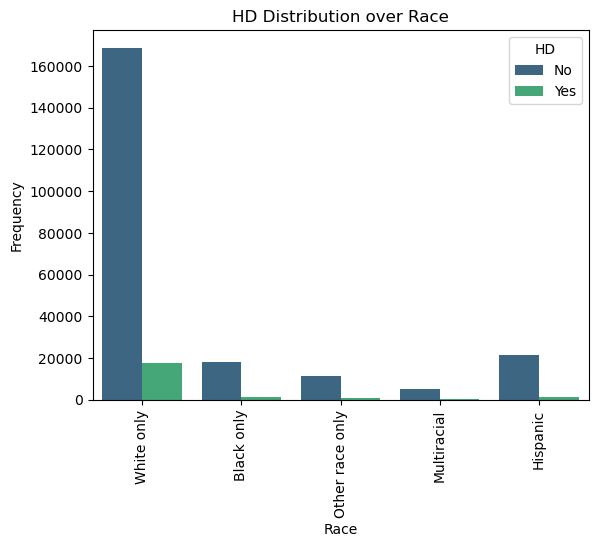

In [20]:
sns.countplot(x=filtered_data_reordered['Race'], hue='HD', data=filtered_data_reordered, palette='viridis')

plt.title('HD Distribution over Race')

# Set labels and rotate x-axis labels
plt.xlabel('Race')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Adjust the rotation angle as needed
legend_labels = ['No', 'Yes']
plt.legend(title='HD', labels=legend_labels,loc='upper right')

# Show the plot
plt.show()

<Figure size 800x800 with 0 Axes>

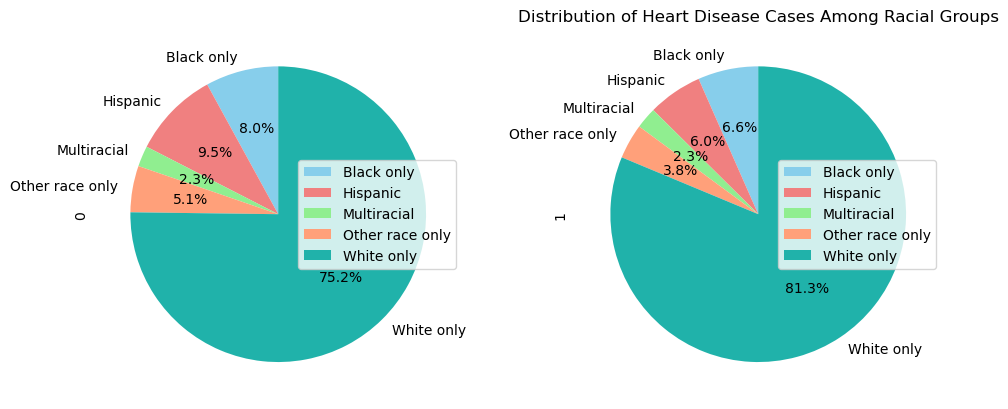

In [21]:
plt.figure(figsize=(8, 8))
filtered_data_reordered['HD'].groupby(filtered_data_reordered['Race']).value_counts().unstack().plot.pie(subplots=True, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral','lightgreen', 'lightsalmon', 'lightseagreen'])
                                                                                                     

plt.subplots_adjust(right=1.5)
                                                                      

# Customize the plot
plt.title('Distribution of Heart Disease Cases Among Racial Groups')

# Show the plot
plt.show()

In [28]:
race_HD_Yes_ratios = filtered_data_reordered.groupby('Race')['HD'].value_counts(normalize=True).unstack()
race_HD_Yes_ratios['HD Ratio'] = np.ceil((race_HD_Yes_ratios[1] / (race_HD_Yes_ratios[1] + race_HD_Yes_ratios[0]))*100)
race_HD_Yes_ratios

HD,0,1,HD Ratio
Race,,,
Black only,0.926125,0.073875,8.0
Hispanic,0.942933,0.057067,6.0
Multiracial,0.909694,0.090306,10.0
Other race only,0.932323,0.067677,7.0
White only,0.905708,0.094292,10.0


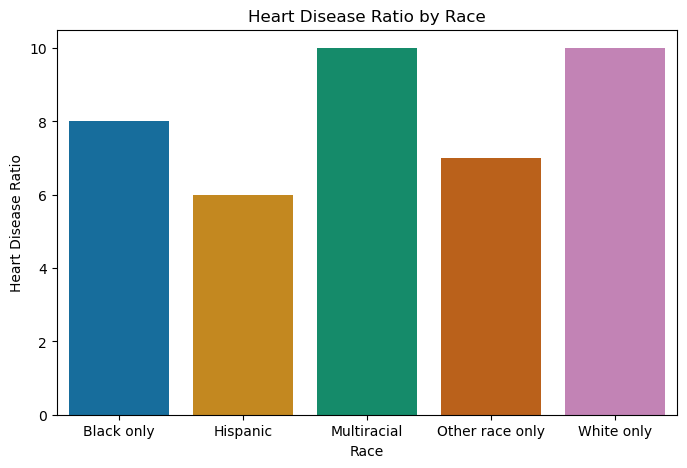

In [29]:
race_HD_Yes_ratios_reset = race_HD_Yes_ratios.reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x='Race', y='HD Ratio', data=race_HD_Yes_ratios_reset, palette='colorblind')
plt.title('Heart Disease Ratio by Race')
plt.xlabel('Race')
plt.ylabel('Heart Disease Ratio')
plt.show()

In [30]:
filtered_data_reordered['Age'].value_counts()

Age
 65-69    28557
 60-64    26720
 70-74    25739
 55-59    22224
 50-54    19913
 75-79    18136
 80+      17816
 40-44    16973
 45-49    16753
 35-39    15614
 30-34    13346
 18-24    13122
 25-29    11109
Name: count, dtype: int64

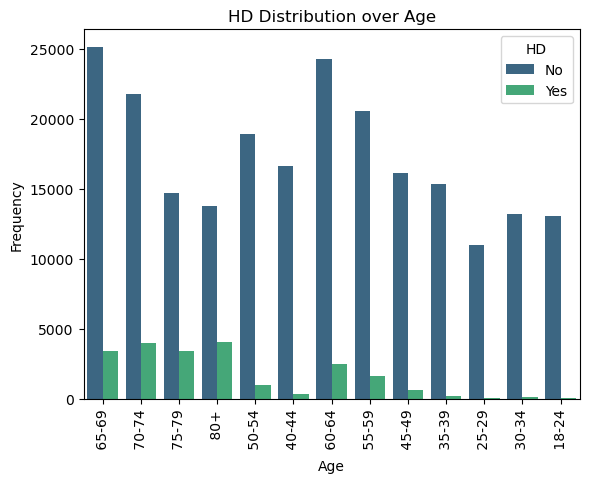

In [31]:
sns.countplot(x=filtered_data_reordered['Age'], hue='HD', data=filtered_data_reordered, palette='viridis')

plt.title('HD Distribution over Age')

# Set labels and rotate x-axis labels
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Adjust the rotation angle as needed
legend_labels = ['No', 'Yes']
plt.legend(title='HD', labels=legend_labels,loc='upper right')

# Show the plot
plt.show()

In [33]:
Age_HD_Yes_ratios = filtered_data_reordered.groupby('Age')['HD'].value_counts(normalize=True).unstack()
Age_HD_Yes_ratios['HD Ratio'] = np.ceil((Age_HD_Yes_ratios[1] / (Age_HD_Yes_ratios[1] + Age_HD_Yes_ratios[0]))*100)
Age_HD_Yes_ratios

HD,0,1,HD Ratio
Age,,,
18-24,0.993217,0.006783,1.0
25-29,0.991448,0.008552,1.0
30-34,0.988836,0.011164,2.0
35-39,0.984437,0.015563,2.0
40-44,0.978731,0.021269,3.0
45-49,0.963410,0.036590,4.0
50-54,0.948275,0.051725,6.0
55-59,0.925621,0.074379,8.0
60-64,0.907859,0.092141,10.0


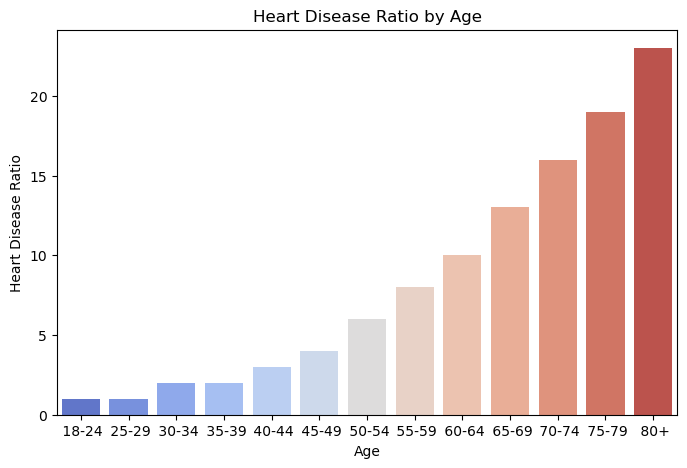

In [34]:
Age_HD_Yes_ratios_reset = Age_HD_Yes_ratios.reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x='Age', y='HD Ratio', data=Age_HD_Yes_ratios_reset, palette='coolwarm')
plt.title('Heart Disease Ratio by Age')
plt.xlabel('Age')
plt.ylabel('Heart Disease Ratio')
plt.show()

In [35]:
filtered_data_reordered['Sex'].value_counts()

Sex
F    127811
M    118211
Name: count, dtype: int64

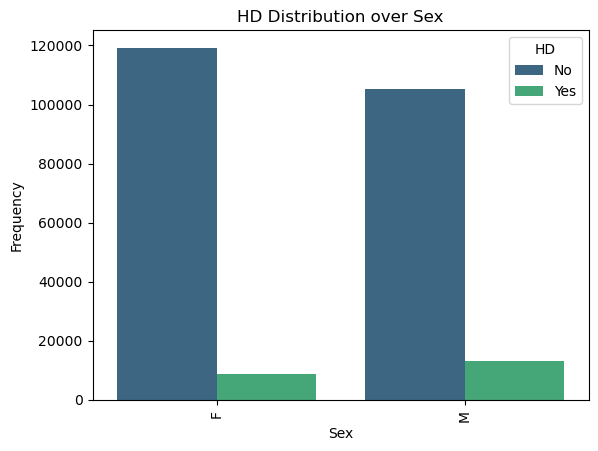

In [36]:
sns.countplot(x=filtered_data_reordered['Sex'], hue='HD', data=filtered_data_reordered, palette='viridis')

plt.title('HD Distribution over Sex')

# Set labels and rotate x-axis labels
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Adjust the rotation angle as needed
legend_labels = ['No', 'Yes']
plt.legend(title='HD', labels=legend_labels,loc='upper right')

# Show the plot
plt.show()

In [40]:
Sex_HD_Yes_ratios = filtered_data_reordered.groupby('Sex')['HD'].value_counts(normalize=True).unstack()
Sex_HD_Yes_ratios['HD Ratio'] = np.ceil((Sex_HD_Yes_ratios[1] / (Sex_HD_Yes_ratios[1] + Sex_HD_Yes_ratios[0]))*100)
Sex_HD_Yes_ratios

HD,0,1,HD Ratio
Sex,,,
F,0.932885,0.067115,7.0
M,0.889706,0.110294,12.0


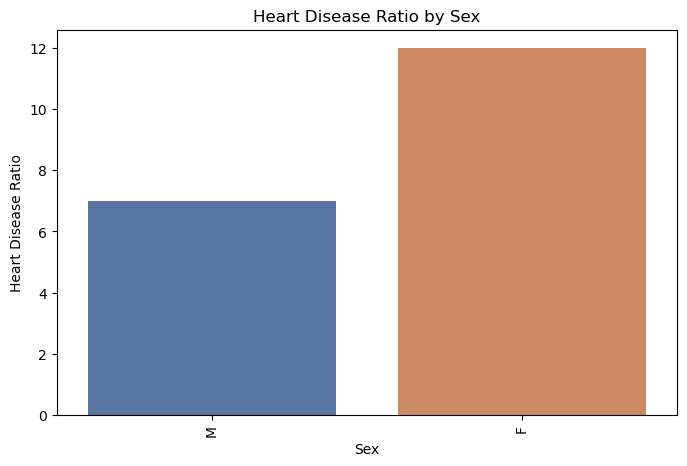

In [41]:
Sex_HD_Yes_ratios_reset = Sex_HD_Yes_ratios.reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x='Sex', y='HD Ratio', data=Sex_HD_Yes_ratios_reset, palette='deep')
plt.title('Heart Disease Ratio by Sex')
plt.xlabel('Sex')
plt.ylabel('Heart Disease Ratio')
plt.xticks(ticks=range(len(filtered_data_reordered['Sex'].unique())),labels=['M', 'F'], rotation=90) 
plt.show()

In [42]:
filtered_data_reordered['Health'].value_counts()

Health
4    86999
3    77409
5    41525
2    30659
1     9430
Name: count, dtype: int64

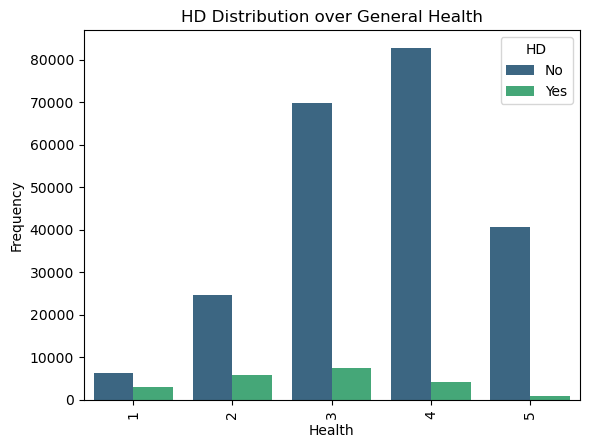

In [43]:
sns.countplot(x=filtered_data_reordered['Health'], hue='HD', data=filtered_data_reordered, palette='viridis')

plt.title('HD Distribution over General Health')

# Set labels and rotate x-axis labels
plt.xlabel('Health')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Adjust the rotation angle as needed
legend_labels = ['No', 'Yes']
plt.legend(title='HD', labels=legend_labels,loc='upper right')

# Show the plot
plt.show()

In [45]:
GA_HD_Yes_ratios = filtered_data_reordered.groupby('Health')['HD'].value_counts(normalize=True).unstack()
GA_HD_Yes_ratios['HD Ratio'] = np.ceil((GA_HD_Yes_ratios[1] / (GA_HD_Yes_ratios[1] + GA_HD_Yes_ratios[0]))*100)
GA_HD_Yes_ratios

HD,0,1,HD Ratio
Health,,,
1,0.680170,0.319830,32.0
2,0.806973,0.193027,20.0
3,0.902724,0.097276,10.0
4,0.951942,0.048058,5.0
5,0.976616,0.023384,3.0


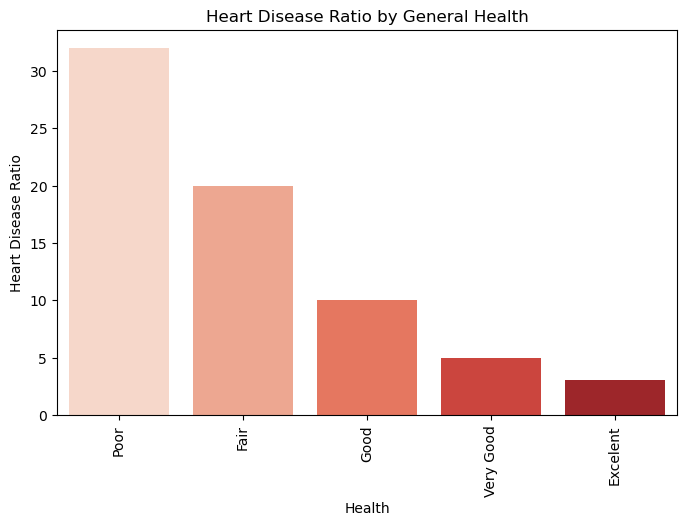

In [46]:
GA_HD_Yes_ratios_reset = GA_HD_Yes_ratios.reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x='Health', y='HD Ratio', data=GA_HD_Yes_ratios_reset, palette='Reds')
labels=['Very good','Good','Excellent','Fair','Poor']
plt.title('Heart Disease Ratio by General Health')
plt.xlabel('Health')
plt.ylabel('Heart Disease Ratio')
plt.xticks(ticks=range(len(filtered_data_reordered['Health'].unique())),labels=['Poor','Fair','Good','Very Good','Excelent'], rotation=90) 
plt.show()

In [47]:
filtered_data_reordered['BMI'].value_counts()

BMI
26    21504
28    18294
25    17232
29    15912
30    15864
      ...  
96        1
97        1
95        1
88        1
85        1
Name: count, Length: 82, dtype: int64

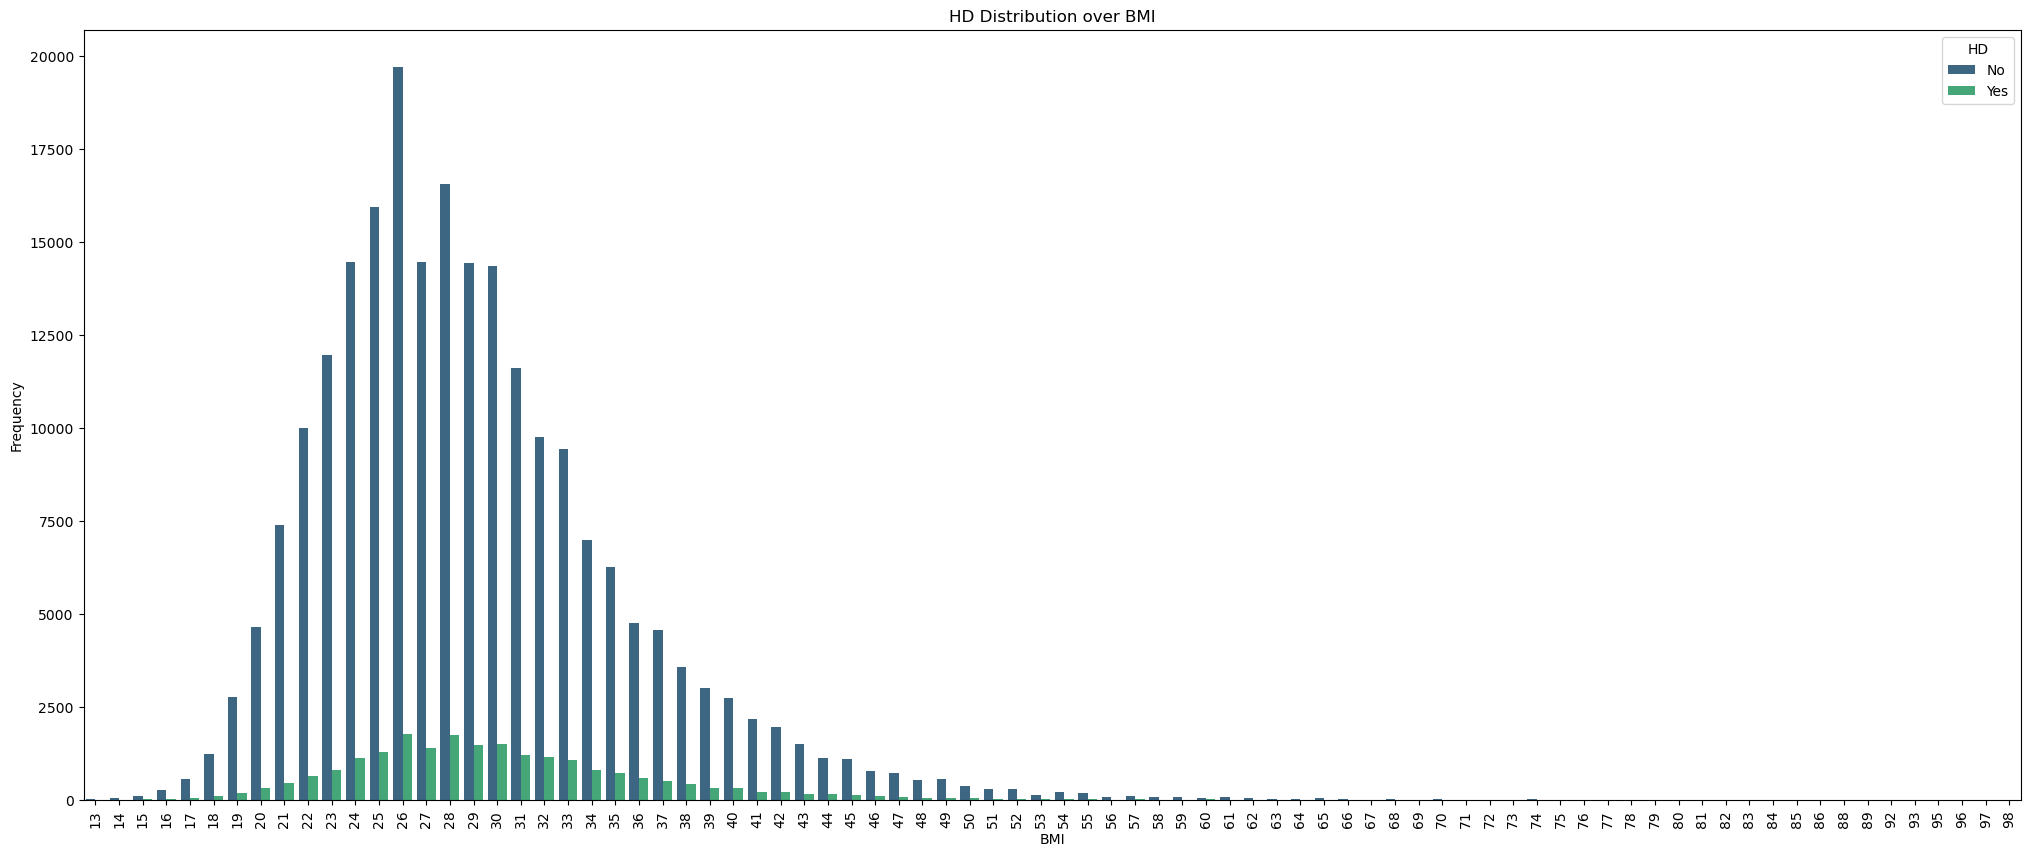

In [48]:
plt.figure(figsize=(25, 10))
sns.countplot(x=filtered_data_reordered['BMI'], hue='HD', data=filtered_data_reordered, palette='viridis')

plt.title('HD Distribution over BMI')

# Set labels and rotate x-axis labels
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Adjust the rotation angle as needed
legend_labels = ['No', 'Yes']
plt.legend(title='HD', labels=legend_labels,loc='upper right')

# Show the plot
plt.show()

In [49]:
BMI_HD_Yes_ratios = filtered_data_reordered.groupby('BMI')['HD'].value_counts(normalize=True).unstack()
BMI_HD_Yes_ratios = BMI_HD_Yes_ratios.fillna(0)
BMI_HD_Yes_ratios['HD Ratio'] = np.ceil((BMI_HD_Yes_ratios[1] / (BMI_HD_Yes_ratios[1] + BMI_HD_Yes_ratios[0]))*100)
BMI_HD_Yes_ratios

HD,0,1,HD Ratio
BMI,,,
13,0.948718,0.051282,6.0
14,0.784314,0.215686,22.0
15,0.840336,0.159664,16.0
16,0.920792,0.079208,8.0
17,0.905537,0.094463,10.0
...,...,...,...
93,0.500000,0.500000,50.0
95,1.000000,0.000000,0.0
96,0.000000,1.000000,100.0


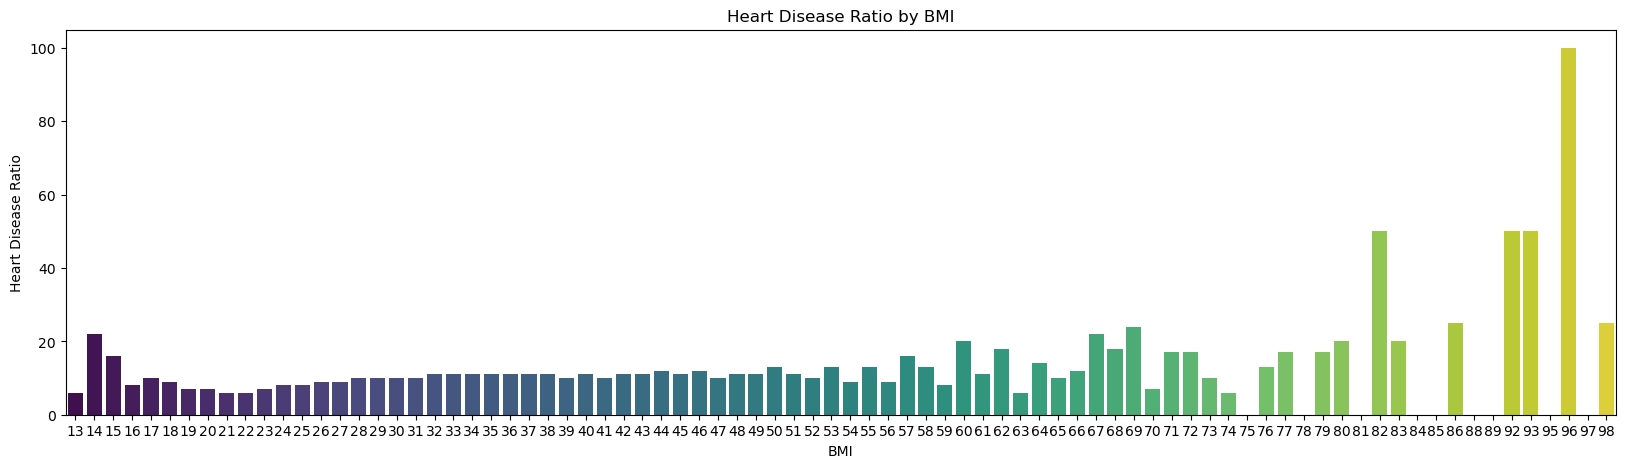

In [50]:
BMI_HD_Yes_ratios_reset = BMI_HD_Yes_ratios.reset_index()
plt.figure(figsize=(20, 5))
sns.barplot(x='BMI', y='HD Ratio', data=BMI_HD_Yes_ratios_reset, palette='viridis')
plt.title('Heart Disease Ratio by BMI')
plt.xlabel('BMI')
plt.ylabel('Heart Disease Ratio')
plt.show()

In [51]:
filtered_data_reordered['PA'].value_counts()

PA
1    191318
0     54704
Name: count, dtype: int64

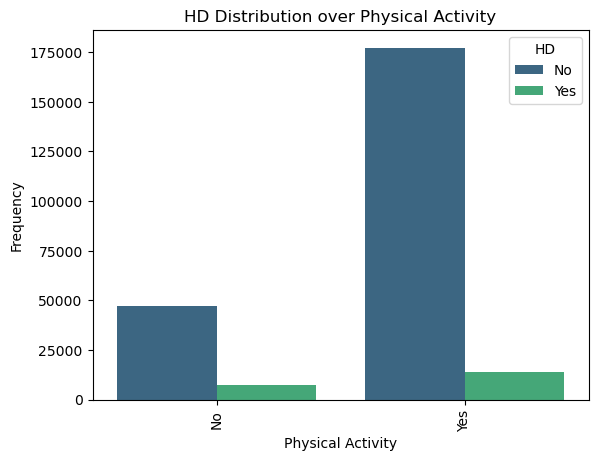

In [52]:
sns.countplot(x=filtered_data_reordered['PA'], hue='HD', data=filtered_data_reordered, palette='viridis')

plt.title('HD Distribution over Physical Activity')

# Set labels and rotate x-axis labels
plt.xlabel('Physical Activity')
plt.ylabel('Frequency')

plt.xticks(ticks=range(len(filtered_data_reordered['PA'].unique())),labels=['No', 'Yes'], rotation=90)  # Adjust the rotation angle as needed
legend_labels = ['No', 'Yes']
plt.legend(title='HD', labels=legend_labels,loc='upper right')

# Show the plot
plt.show()

In [54]:
PA_HD_Yes_ratios = filtered_data_reordered.groupby('PA')['HD'].value_counts(normalize=True).unstack()
PA_HD_Yes_ratios['HD Ratio'] = np.ceil((PA_HD_Yes_ratios[1] / (PA_HD_Yes_ratios[1] + PA_HD_Yes_ratios[0]))*100)
PA_HD_Yes_ratios

HD,0,1,HD Ratio
PA,,,
0,0.861381,0.138619,14.0
1,0.926651,0.073349,8.0


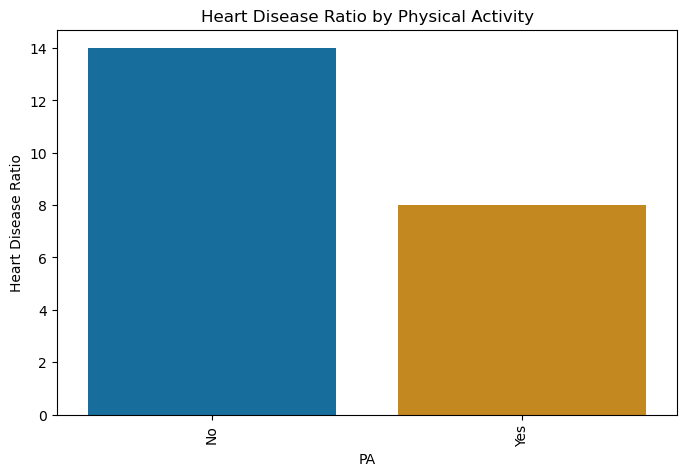

In [55]:
PA_HD_Yes_ratios_reset = PA_HD_Yes_ratios.reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x='PA', y='HD Ratio', data=PA_HD_Yes_ratios_reset, palette='colorblind')
plt.title('Heart Disease Ratio by Physical Activity')
plt.xlabel('PA')
plt.ylabel('Heart Disease Ratio')
plt.xticks(ticks=range(len(filtered_data_reordered['PA'].unique())),labels=['No', 'Yes'], rotation=90) 
plt.show()

In [56]:
filtered_data_reordered['Sleep'].value_counts()

Sleep
7     76447
8     69927
6     53981
5     16417
9     11859
4      6478
10     5468
3      1618
12     1476
2       740
1       563
11      339
16      155
15      154
14      148
18       83
13       79
20       50
24       13
17       11
23        6
19        5
22        5
Name: count, dtype: int64

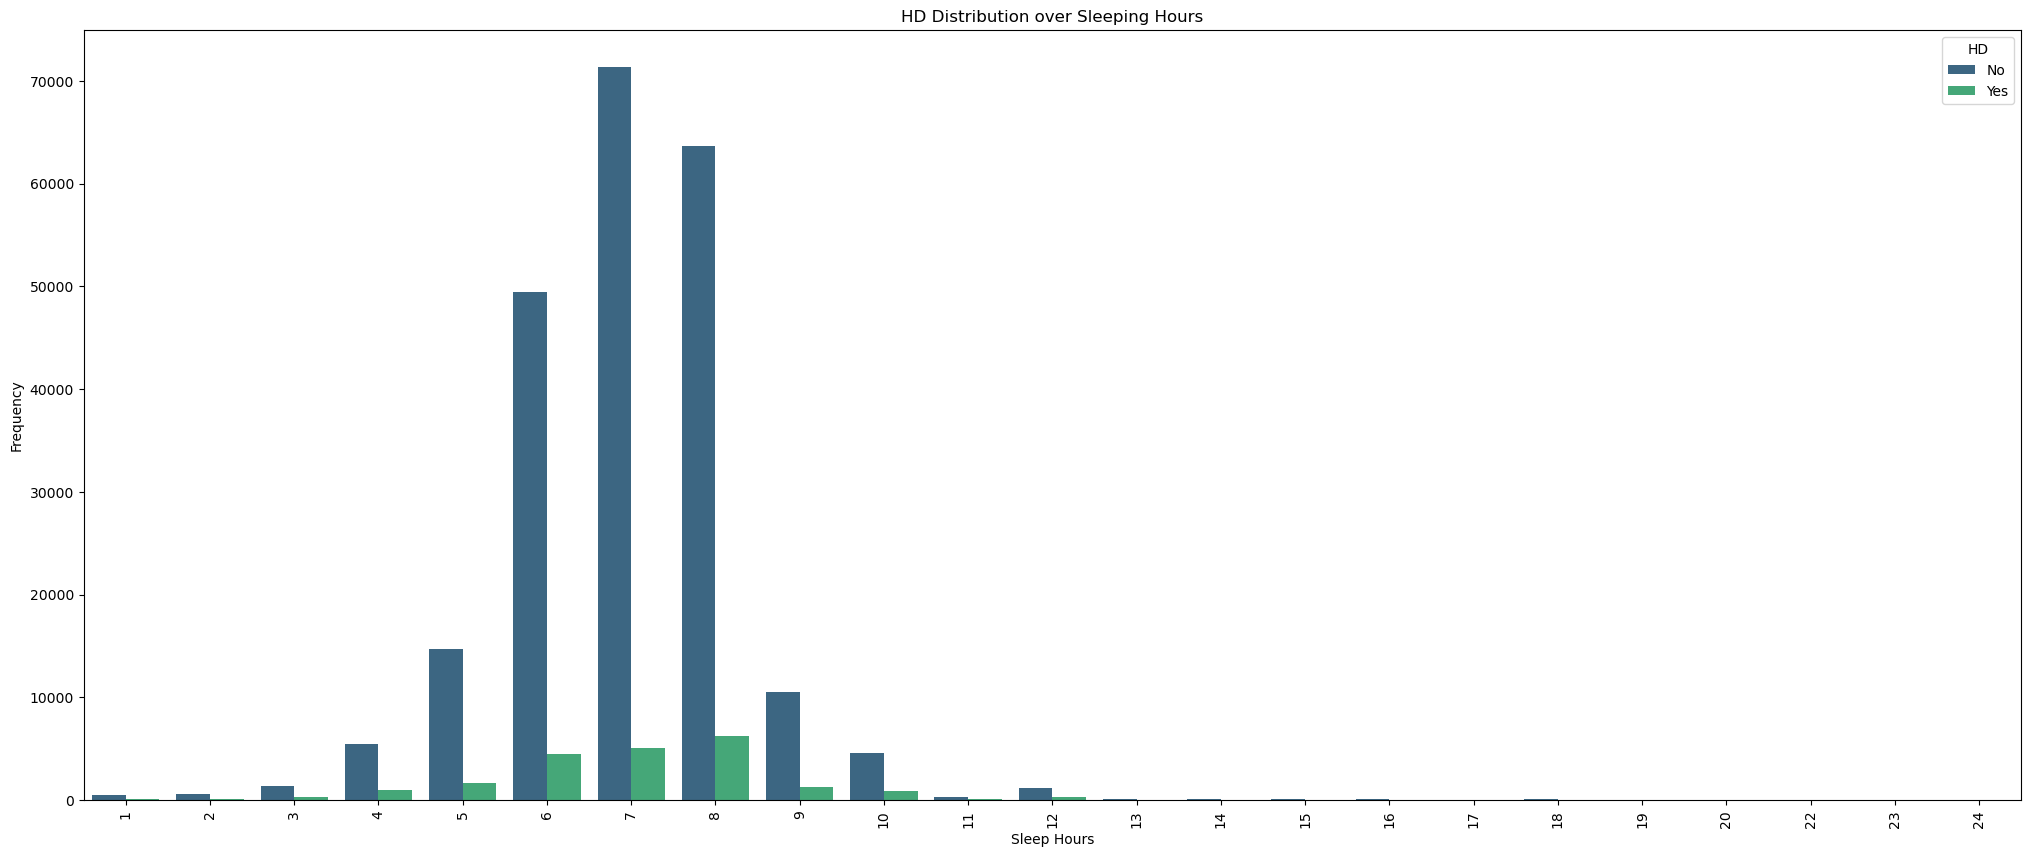

In [57]:
plt.figure(figsize=(25, 10))
sns.countplot(x=filtered_data_reordered['Sleep'], hue='HD', data=filtered_data_reordered, palette='viridis')

plt.title('HD Distribution over Sleeping Hours')

# Set labels and rotate x-axis labels
plt.xlabel('Sleep Hours')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Adjust the rotation angle as needed
legend_labels = ['No', 'Yes']
plt.legend(title='HD', labels=legend_labels,loc='upper right')

# Show the plot
plt.show()

In [59]:
SLP_HD_Yes_ratios = filtered_data_reordered.groupby('Sleep')['HD'].value_counts(normalize=True).unstack()
SLP_HD_Yes_ratios['HD Ratio'] = np.ceil((SLP_HD_Yes_ratios[1] / (SLP_HD_Yes_ratios[1] + SLP_HD_Yes_ratios[0]))*100)
SLP_HD_Yes_ratios

HD,0,1,HD Ratio
Sleep,,,
1,0.896980,0.103020,11.0
2,0.839189,0.160811,17.0
3,0.825093,0.174907,18.0
4,0.845940,0.154060,16.0
5,0.896692,0.103308,11.0
6,0.916637,0.083363,9.0
7,0.933745,0.066255,7.0
8,0.910907,0.089093,9.0
9,0.889451,0.110549,12.0


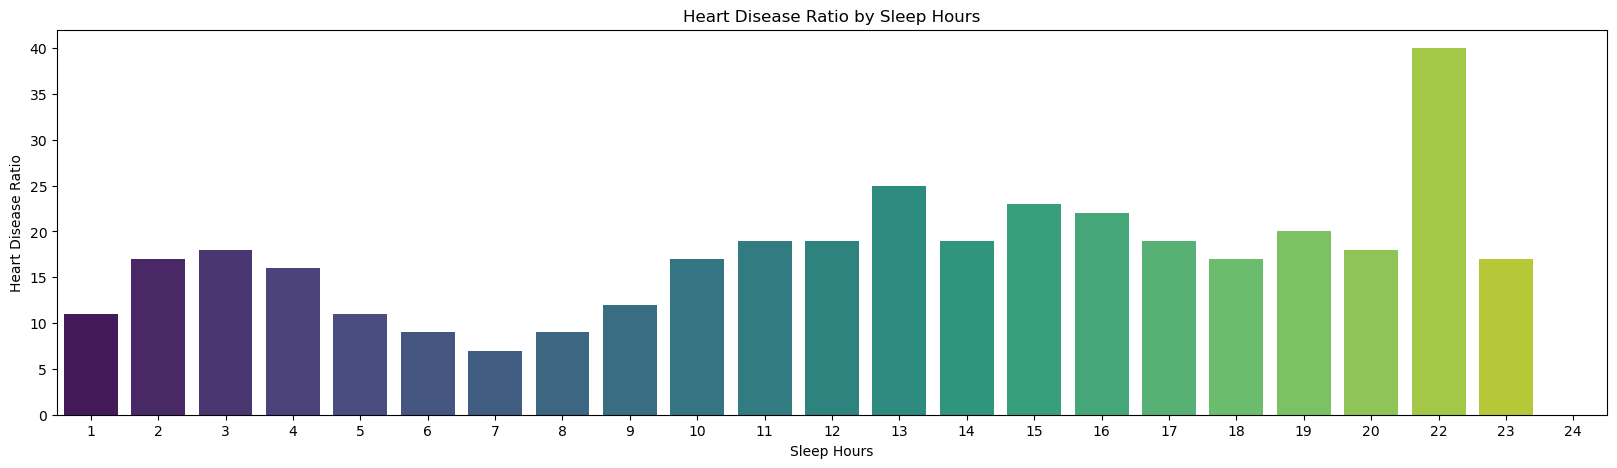

In [60]:
SLP_HD_Yes_ratios_reset = SLP_HD_Yes_ratios.reset_index()
plt.figure(figsize=(20, 5))
sns.barplot(x='Sleep', y='HD Ratio', data=SLP_HD_Yes_ratios_reset, palette='viridis')
plt.title('Heart Disease Ratio by Sleep Hours')
plt.xlabel('Sleep Hours')
plt.ylabel('Heart Disease Ratio')
plt.show()

In [61]:
filtered_data_reordered['Smoker'].value_counts()

Smoker
0    147737
1     98285
Name: count, dtype: int64

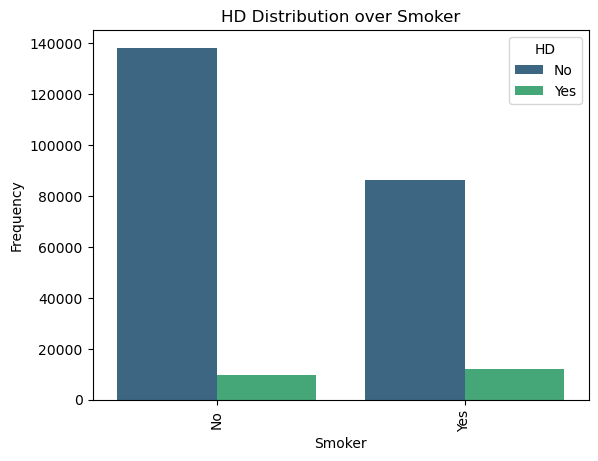

In [62]:
sns.countplot(x=filtered_data_reordered['Smoker'], hue='HD', data=filtered_data_reordered, palette='viridis')

plt.title('HD Distribution over Smoker')

# Set labels and rotate x-axis labels
plt.xlabel('Smoker')
plt.ylabel('Frequency')
plt.xticks(ticks=range(len(filtered_data_reordered['Smoker'].unique())),labels=['No', 'Yes'], rotation=90)  # Adjust the rotation angle as needed
legend_labels = ['No', 'Yes']
plt.legend(title='HD', labels=legend_labels,loc='upper right')

# Show the plot
plt.show()

In [65]:
SMK_HD_Yes_ratios = filtered_data_reordered.groupby('Smoker')['HD'].value_counts(normalize=True).unstack()
SMK_HD_Yes_ratios['HD Ratio'] = np.ceil((SMK_HD_Yes_ratios[1] / (SMK_HD_Yes_ratios[1] + SMK_HD_Yes_ratios[0]))*100)
SMK_HD_Yes_ratios

HD,0,1,HD Ratio
Smoker,,,
0,0.935866,0.064134,7.0
1,0.876471,0.123529,13.0


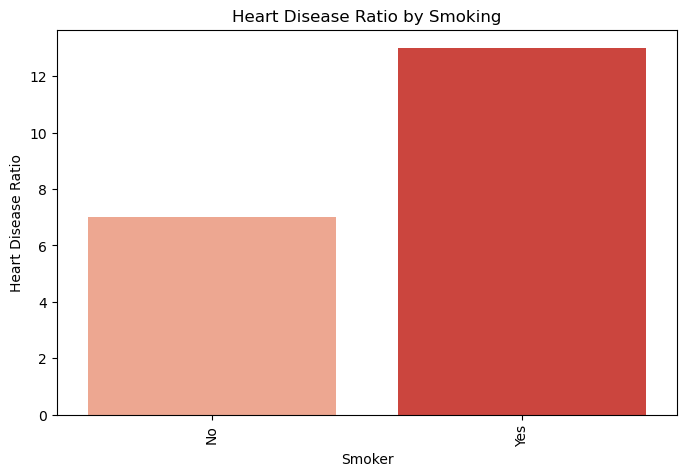

In [66]:
SMK_HD_Yes_ratios_reset = SMK_HD_Yes_ratios.reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x='Smoker', y='HD Ratio', data=SMK_HD_Yes_ratios_reset, palette='Reds')
plt.title('Heart Disease Ratio by Smoking')
plt.xlabel('Smoker')
plt.ylabel('Heart Disease Ratio')
plt.xticks(ticks=range(len(filtered_data_reordered['Smoker'].unique())),labels=['No', 'Yes'], rotation=90) 
plt.show()

In [67]:
filtered_data_reordered['Alcohol'].value_counts()

Alcohol
1    135307
0    110715
Name: count, dtype: int64

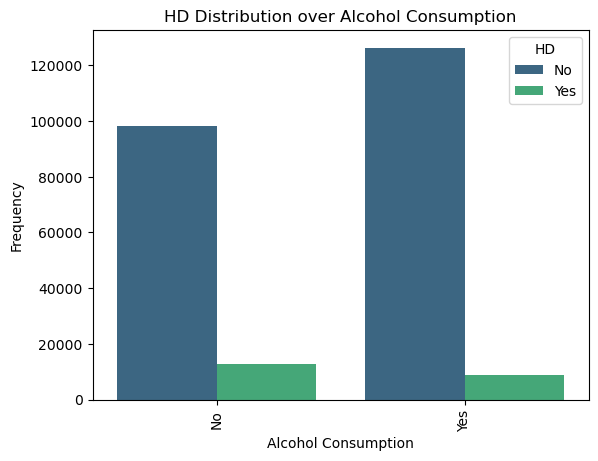

In [68]:

sns.countplot(x=filtered_data_reordered['Alcohol'], hue='HD', data=filtered_data_reordered, palette='viridis')

plt.title('HD Distribution over Alcohol Consumption')

# Set labels and rotate x-axis labels
plt.xlabel('Alcohol Consumption')
plt.ylabel('Frequency')
plt.xticks(ticks=range(len(filtered_data_reordered['Alcohol'].unique())),labels=['No', 'Yes'],rotation=90)  # Adjust the rotation angle as needed
legend_labels = ['No', 'Yes']
plt.legend(title='HD', labels=legend_labels,loc='upper right')

# Show the plot
plt.show()

In [70]:
ALK_HD_Yes_ratios = filtered_data_reordered.groupby('Alcohol')['HD'].value_counts(normalize=True).unstack()
ALK_HD_Yes_ratios['HD Ratio'] = np.ceil((ALK_HD_Yes_ratios[1] / (ALK_HD_Yes_ratios[1] + ALK_HD_Yes_ratios[0]))*100)
ALK_HD_Yes_ratios

HD,0,1,HD Ratio
Alcohol,,,
0,0.885716,0.114284,12.0
1,0.933758,0.066242,7.0


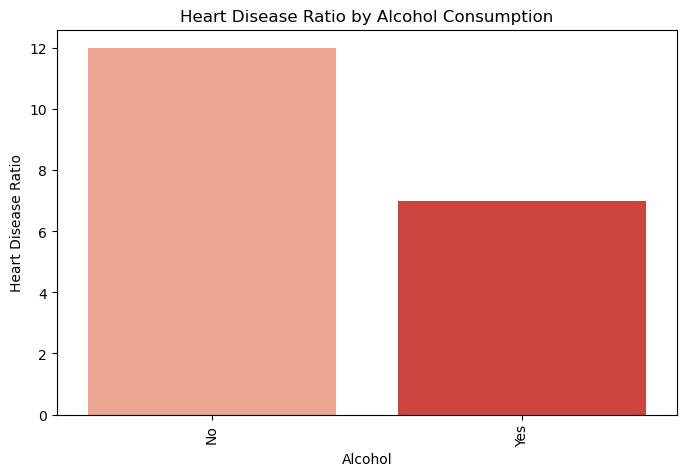

In [71]:
ALK_HD_Yes_ratios_reset = ALK_HD_Yes_ratios.reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x='Alcohol', y='HD Ratio', data=ALK_HD_Yes_ratios_reset, palette='Reds')
plt.title('Heart Disease Ratio by Alcohol Consumption')
plt.xlabel('Alcohol')
plt.ylabel('Heart Disease Ratio')
plt.xticks(ticks=range(len(filtered_data_reordered['Alcohol'].unique())),labels=['No', 'Yes'], rotation=90) 
plt.show()

In [72]:
filtered_data_reordered['Difficulty Walking'].value_counts()

Difficulty Walking
0    209952
1     36070
Name: count, dtype: int64

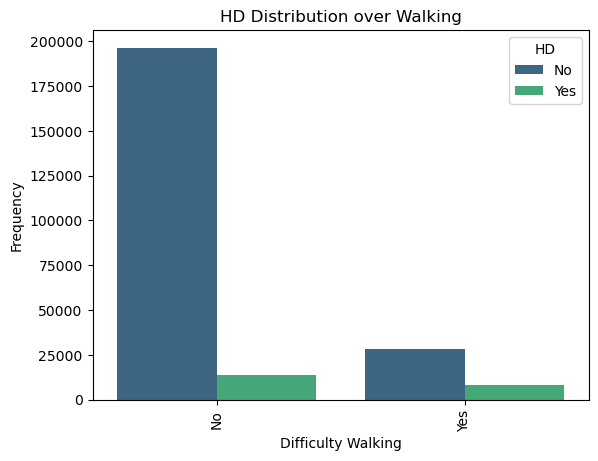

In [73]:
sns.countplot(x=filtered_data_reordered['Difficulty Walking'], hue='HD', data=filtered_data_reordered, palette='viridis')

plt.title('HD Distribution over Walking')

# Set labels and rotate x-axis labels
plt.xlabel('Difficulty Walking')
plt.ylabel('Frequency')
plt.xticks(ticks=range(len(filtered_data_reordered['Difficulty Walking'].unique())),labels=['No', 'Yes'], rotation=90)  # Adjust the rotation angle as needed
legend_labels = ['No', 'Yes']
plt.legend(title='HD', labels=legend_labels,loc='upper right')

# Show the plot
plt.show()

In [74]:
filtered_data_reordered['Diabetes'].value_counts()

Diabetes
0    210226
1     35796
Name: count, dtype: int64

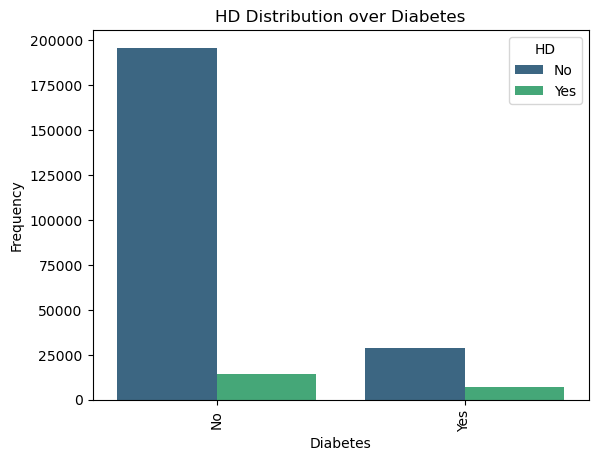

In [75]:
sns.countplot(x=filtered_data_reordered['Diabetes'], hue='HD', data=filtered_data_reordered, palette='viridis')

plt.title('HD Distribution over Diabetes')

# Set labels and rotate x-axis labels
plt.xlabel('Diabetes')
plt.ylabel('Frequency')
plt.xticks(ticks=range(len(filtered_data_reordered['Diabetes'].unique())),labels=['No', 'Yes'], rotation=90)  # Adjust the rotation angle as needed
legend_labels = ['No', 'Yes']
plt.legend(title='HD', labels=legend_labels,loc='upper right')


# Show the plot
plt.show()

In [76]:
filtered_data_reordered['COPD'].value_counts()

COPD
0    227028
1     18994
Name: count, dtype: int64

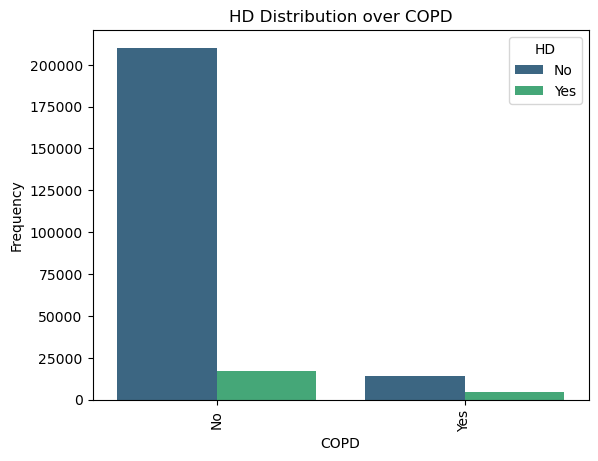

In [77]:
sns.countplot(x=filtered_data_reordered['COPD'], hue='HD', data=filtered_data_reordered, palette='viridis')

plt.title('HD Distribution over COPD')

# Set labels and rotate x-axis labels
plt.xlabel('COPD')
plt.ylabel('Frequency')
plt.xticks(ticks=range(len(filtered_data_reordered['COPD'].unique())),labels=['No', 'Yes'], rotation=90)  # Adjust the rotation angle as needed
legend_labels = ['No', 'Yes']
plt.legend(title='HD', labels=legend_labels,loc='upper right')


# Show the plot
plt.show()

In [78]:
filtered_data_reordered['Skin Cancer'].value_counts()

Skin Cancer
0    225001
1     21021
Name: count, dtype: int64

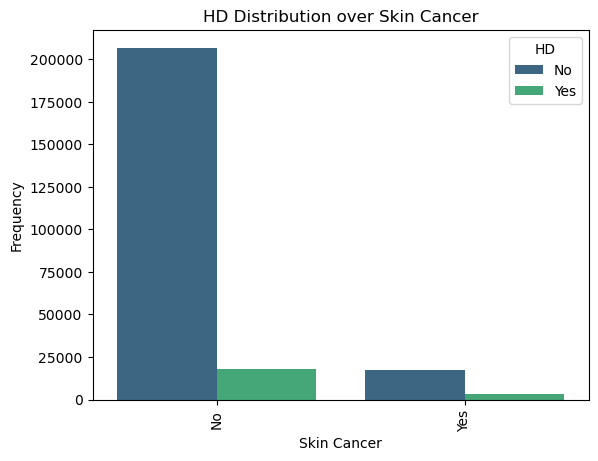

In [79]:
sns.countplot(x=filtered_data_reordered['Skin Cancer'], hue='HD', data=filtered_data_reordered, palette='viridis')

plt.title('HD Distribution over Skin Cancer')

# Set labels and rotate x-axis labels
plt.xlabel('Skin Cancer')
plt.ylabel('Frequency')
plt.xticks(ticks=range(len(filtered_data_reordered['Skin Cancer'].unique())),labels=['No', 'Yes'], rotation=90)  # Adjust the rotation angle as needed
legend_labels = ['No', 'Yes']
plt.legend(title='HD', labels=legend_labels,loc='upper right')

# Show the plot
plt.show()

In [80]:
filtered_data_reordered['Asthma'].value_counts()

Asthma
0    209493
1     36529
Name: count, dtype: int64

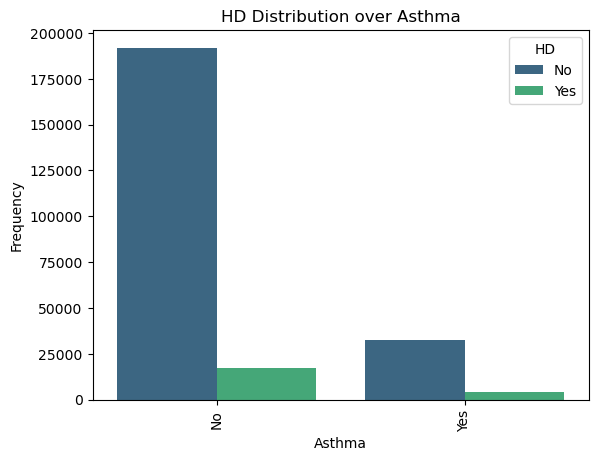

In [81]:
sns.countplot(x=filtered_data_reordered['Asthma'], hue='HD', data=filtered_data_reordered, palette='viridis')

plt.title('HD Distribution over Asthma')

# Set labels and rotate x-axis labels
plt.xlabel('Asthma')
plt.ylabel('Frequency')
plt.xticks(ticks=range(len(filtered_data_reordered['Asthma'].unique())),labels=['No', 'Yes'], rotation=90)  # Adjust the rotation angle as needed
legend_labels = ['No', 'Yes']
plt.legend(title='HD', labels=legend_labels,loc='upper right')

# Show the plot
plt.show()

In [82]:
filtered_data_reordered['Stroke'].value_counts()

Stroke
0    235910
1     10112
Name: count, dtype: int64

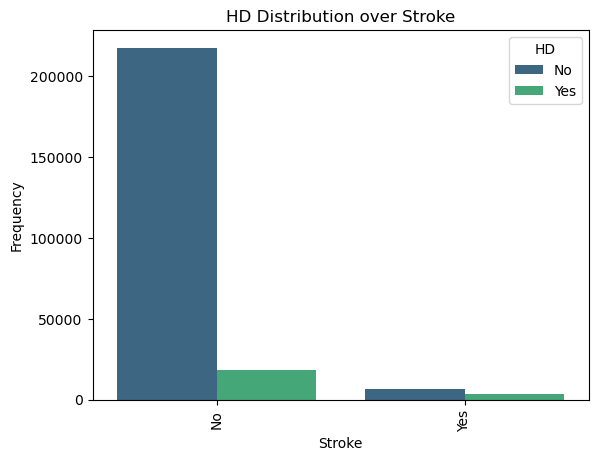

In [83]:
sns.countplot(x=filtered_data_reordered['Stroke'], hue='HD', data=filtered_data_reordered, palette='viridis')

plt.title('HD Distribution over Stroke')

# Set labels and rotate x-axis labels
plt.xlabel('Stroke')
plt.ylabel('Frequency')
plt.xticks(ticks=range(len(filtered_data_reordered['Stroke'].unique())),labels=['No', 'Yes'], rotation=90)  # Adjust the rotation angle as needed
legend_labels = ['No', 'Yes']
plt.legend(title='HD', labels=legend_labels,loc='upper right')

# Show the plot
plt.show()

In [84]:
filtered_data_reordered['Kidney Disease'].value_counts()

Kidney Disease
0    234738
1     11284
Name: count, dtype: int64

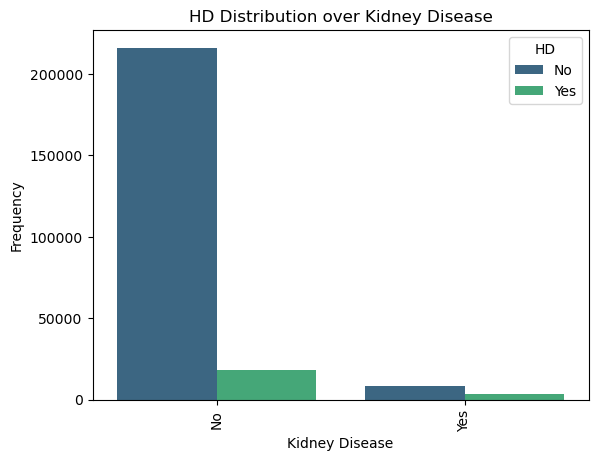

In [85]:
sns.countplot(x=filtered_data_reordered['Kidney Disease'], hue='HD', data=filtered_data_reordered, palette='viridis')

plt.title('HD Distribution over Kidney Disease')

# Set labels and rotate x-axis labels
plt.xlabel('Kidney Disease')
plt.ylabel('Frequency')
plt.xticks(ticks=range(len(filtered_data_reordered['Kidney Disease'].unique())),labels=['No', 'Yes'], rotation=90)  # Adjust the rotation angle as needed
legend_labels = ['No', 'Yes']
plt.legend(title='HD', labels=legend_labels,loc='upper right')

# Show the plot
plt.show()

In [86]:
filtered_data_reordered['Sex'] = filtered_data_reordered['Sex'].replace({'F': 1, 'M': 0})
contingency_table = pd.crosstab(filtered_data_reordered['Sex'], filtered_data_reordered['HD'])

# Display the contingency table
print("Contingency Table:")
print(contingency_table)

# Perform Pearson's Chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("\nChi-square Statistic:", chi2_stat)
print("P-value:", p_value)
print("Degrees of Freedom:", dof)
print("\nExpected Frequencies:")
print(pd.DataFrame(expected, index=filtered_data_df['Sex'].unique(), columns=filtered_data_df['HD'].unique()))



Contingency Table:
HD        0      1
Sex               
0    105173  13038
1    119233   8578

Chi-square Statistic: 1428.1811955752205
P-value: 0.0
Degrees of Freedom: 1

Expected Frequencies:
               0             1
F  107824.737893  10386.262107
M  116581.262107  11229.737893


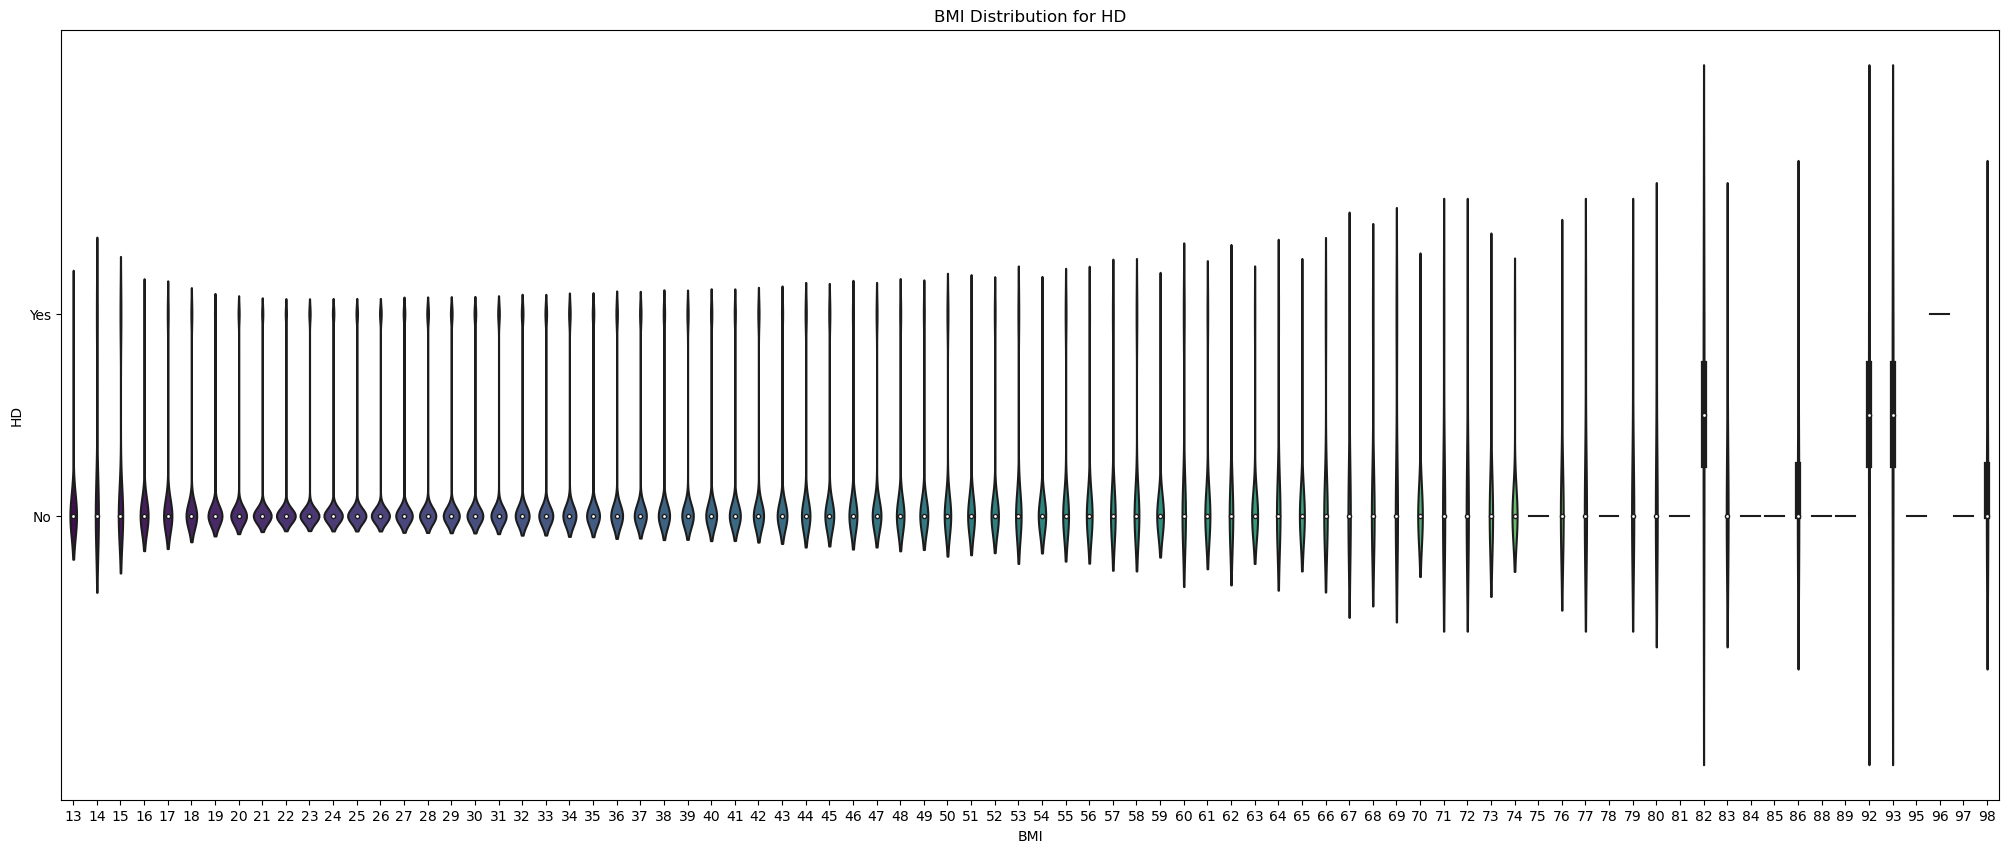

In [87]:
plt.figure(figsize=(25, 10))
sns.violinplot(x='BMI', y='HD', data=filtered_data_reordered, palette='viridis', tick_labels=['No', 'Yes'])
plt.title('BMI Distribution for HD')
plt.xlabel('BMI')
plt.ylabel('HD')
plt.yticks([0, 1], ['No', 'Yes'])
plt.show()

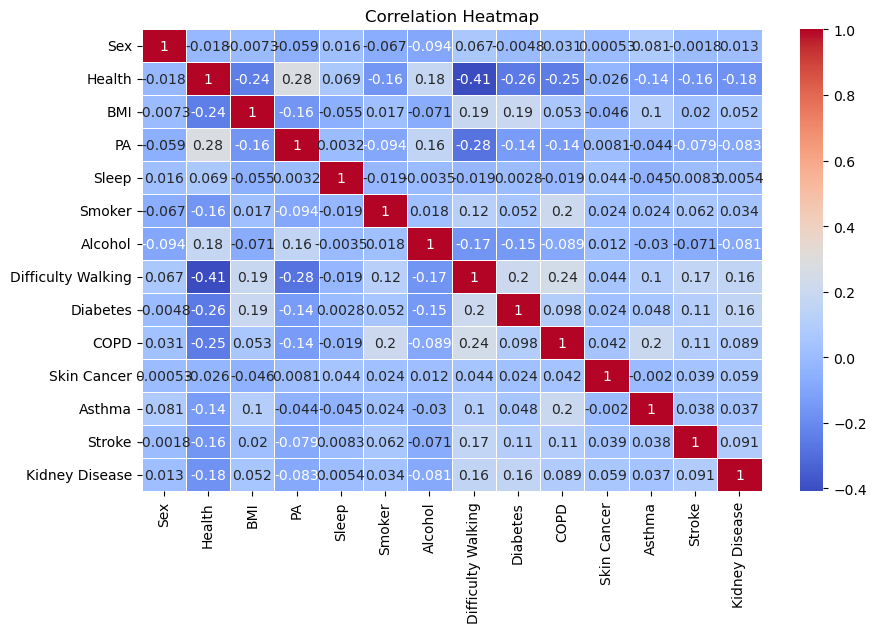

In [88]:
# 1. Correlation Heatmap
plt.figure(figsize=(10, 6))
numeric_df=filtered_data_reordered.select_dtypes(include='number')
correlation_matrix = numeric_df.drop(['HD'], axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

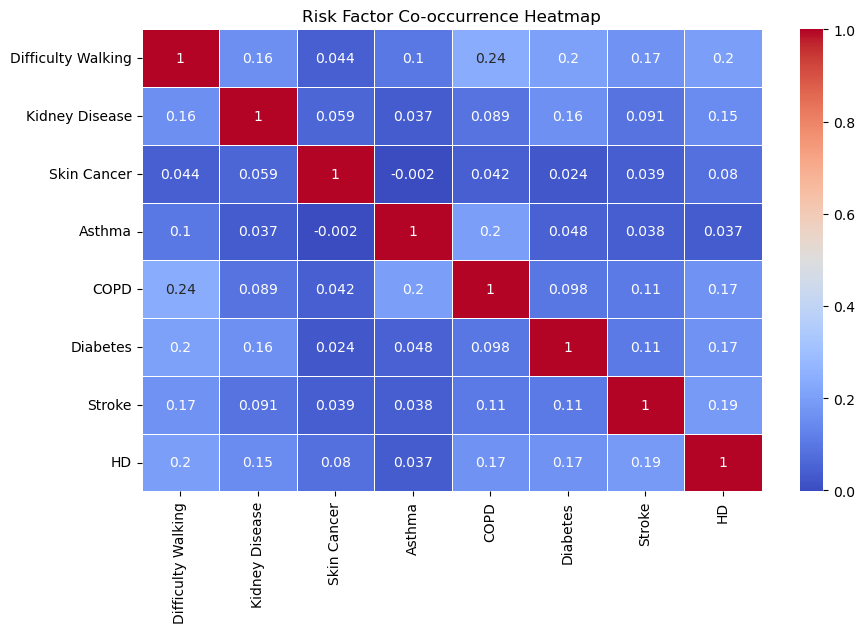

In [89]:
risk_factors = ['Difficulty Walking', 'Kidney Disease', 'Skin Cancer', 'Asthma', 'COPD', 'Diabetes', 'Stroke', 'HD']
# 2. Risk Factor Co-occurrence Heatmap
plt.figure(figsize=(10, 6))
co_occurrence_matrix = numeric_df[risk_factors].corr()
sns.heatmap(co_occurrence_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Risk Factor Co-occurrence Heatmap')
plt.show()

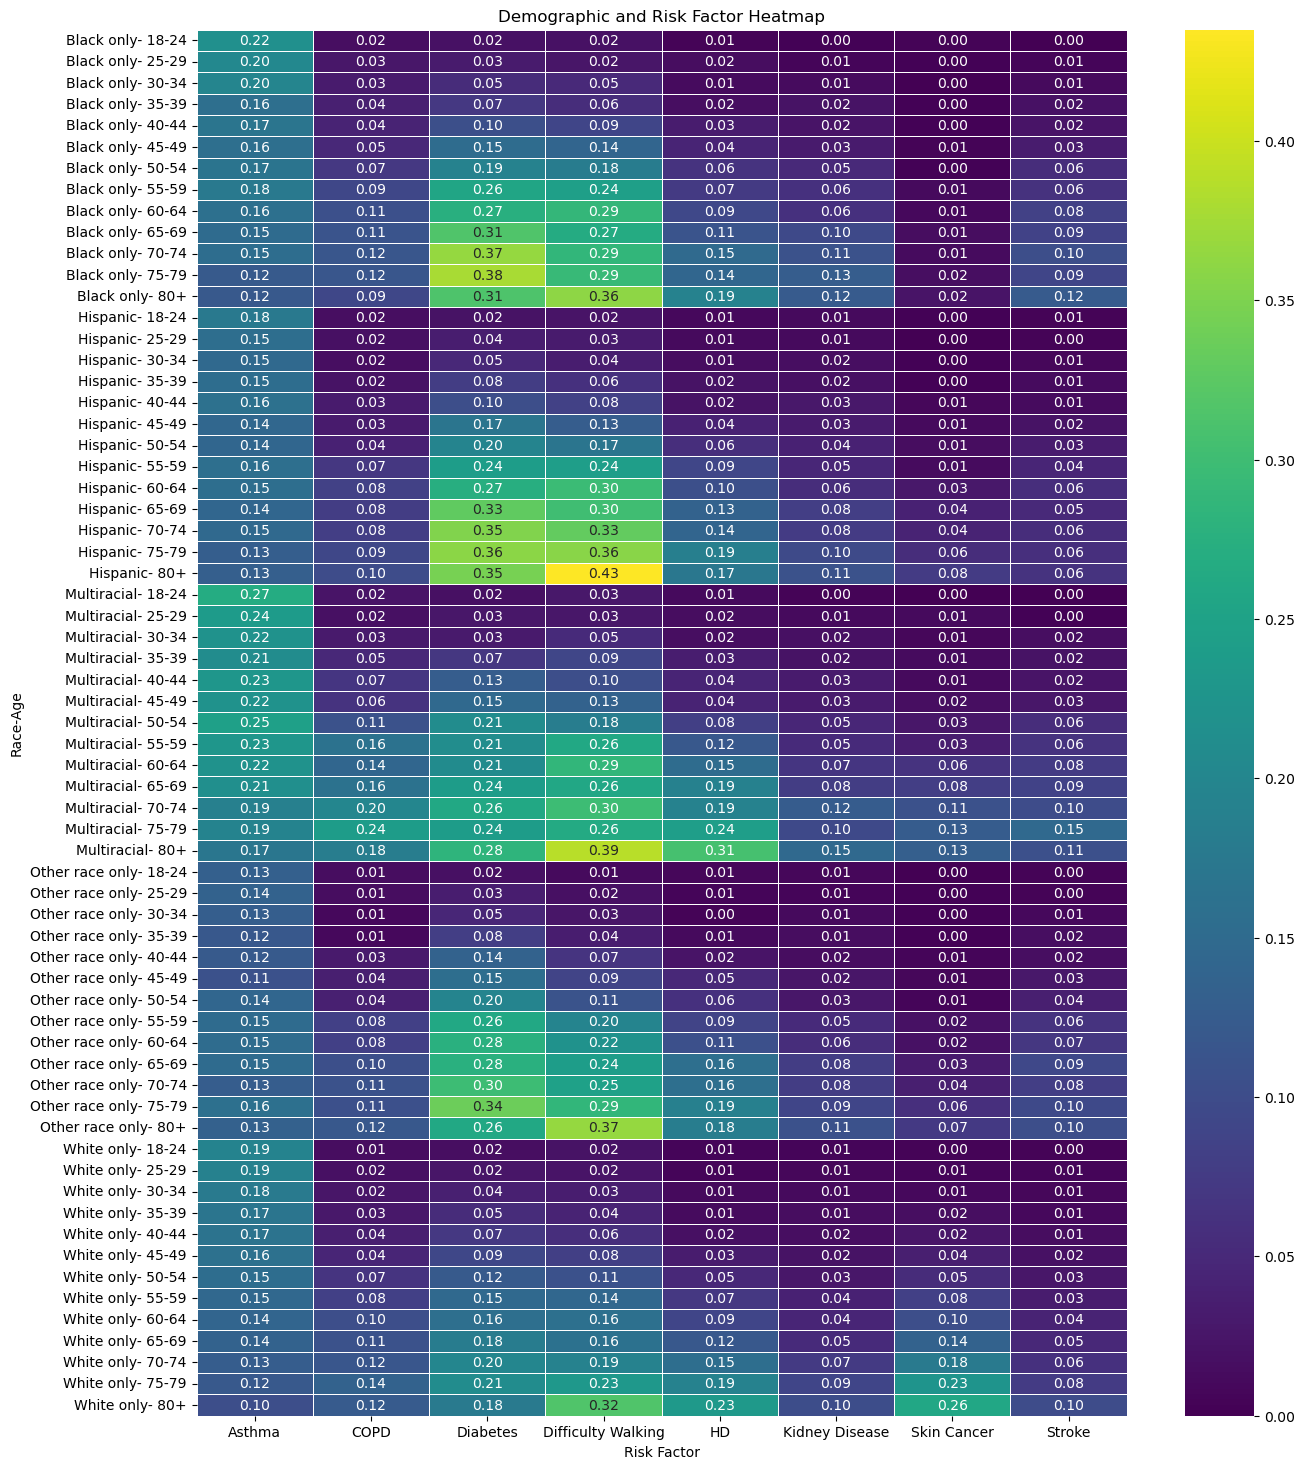

In [90]:
# 3. Demographic and Risk Factor Heatmap
plt.figure(figsize=(15, 18))
demographic_risk_df = pd.melt(filtered_data_reordered, id_vars=['Race','Age'], value_vars=risk_factors, var_name='Risk Factor', value_name='Prevalence')
sns.heatmap(demographic_risk_df.groupby(['Race', 'Age', 'Risk Factor'])['Prevalence'].mean().unstack(), cmap='viridis', annot=True, fmt='.2f', linewidths=.5)
plt.title('Demographic and Risk Factor Heatmap')
plt.show()